In [89]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [90]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [91]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score, accuracy_score

def perfo(y_true, y_pred, beta=1):
    """
    Evaluate the performance of a classification model.
    
    Parameters:
    y_true (list): List of true class labels
    y_pred (list): List of predicted class labels
    beta (float): Weight of recall in the F-beta score

    Returns:
    dict: Dictionary containing performance metrics
    """
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate metrics
    sensitivity = recall = tp / (tp + fn)  # Sensitivity (Recall)
    specificity = tn / (tn + fp)         # Specificity
    precision = precision_score(y_true, y_pred)  # Precision
    accuracy = accuracy_score(y_true, y_pred)    # Accuracy
    f_beta = fbeta_score(y_true, y_pred, beta=beta)  # F-beta score

    # Compile metrics into a dictionary
    metrics = {
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'Accuracy': accuracy,
        'F-beta Score': f_beta
    }

    return metrics

# Example usage:
# y_true = [actual class labels]
# y_pred = [predicted class labels]
# metrics = perfo(y_true, y_pred, beta=1)
# print(metrics)


# 데이터 불러오기

In [92]:
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소\\거비프 데이터-2023\\code'

In [93]:
# 파일이 존재하는 경로 불러오기 및 리스트
path = '../data'
file_lst = os.listdir(path)# 폴더 내 파일 리스트
file_lst

['train.csv',
 '거비프 데이터-2020.xlsx',
 '거비프 데이터-2021.xlsx',
 '거비프 데이터-2022.xlsx',
 '거비프 데이터-2023.xlsx',
 '도축두수 상위 KPN 산차별 성적 평균.xlsx']

In [94]:
# data1 = pd.read_excel('../data/거비프 데이터-2020.xlsx')
# data2 = pd.read_excel('../data/거비프 데이터-2021.xlsx')
# data3 = pd.read_excel('../data/거비프 데이터-2022.xlsx')

data4 = pd.read_excel('../data/거비프 데이터-2023.xlsx')

In [95]:
df = pd.DataFrame()

for i in file_lst:
    if '2020' in i or '2021' in i or '2022' in i:  # Check if the file name contains '2020', '2021', or '2022'
        data_3 = pd.read_excel(path + '/' + i)
        df = pd.concat([df, data_3])

df = df.reset_index(drop=True)
df.head(2)

,목장코드,출생월,도축개월령,생시체중,출생산차,EPD 근내,EPD 냉도체중,KPN체고,KPN체장,실제 도축 도체중,...,개월령의 근내평균,개월령의 도체중평균,개월령의 도체범위의 근내평균,개월령의 도체범위의 도체중평균,형매근내평균가산점수,거세우 형매 도축 단가 가산 평균,어미형매근내평균가산점수,외할미형매근내평균가산점수,농가근내평균가산점수,농가도체중평균가산점수
0,263660,2017-06-25,31,713,2,-0.3255,0.8868,132.9,150.4,399,...,5.47,433.52,4.81,384.22,-2.34,0,0.0000,0.0,0.83,55.17
1,389182,2017-06-10,31,745,5,0.1628,-6.9983,128.3,144.0,417,...,5.51,425.51,5.69,424.95,2.03,947,-0.5983,0.0,1.88,22.40


In [96]:
df.shape

(278127, 23)

# 탐색

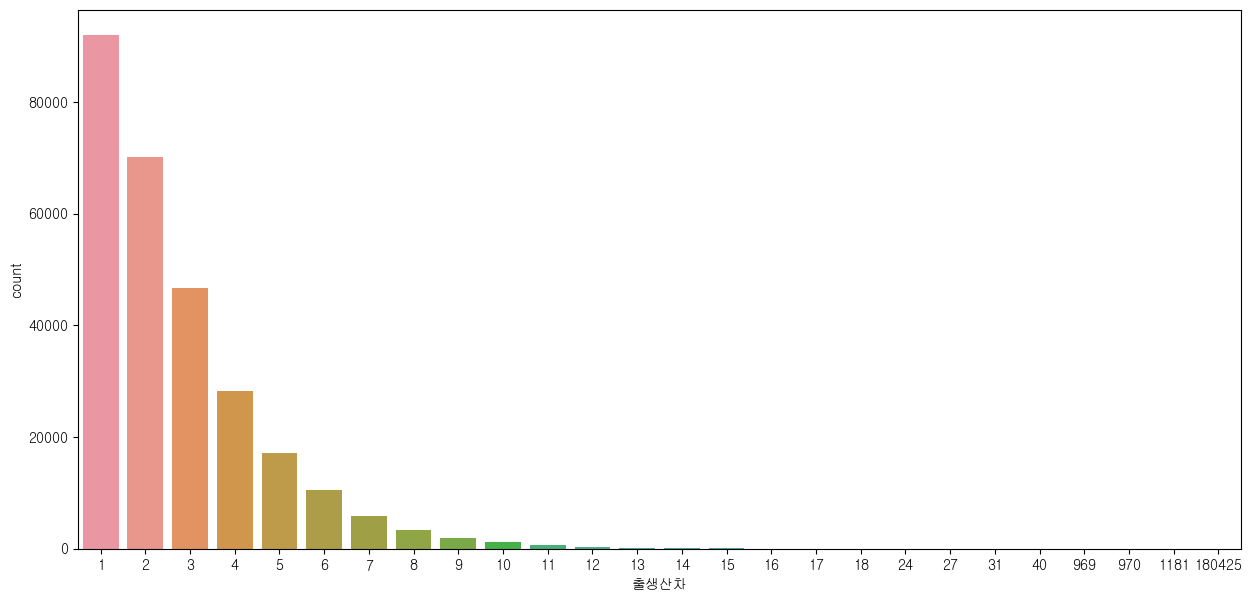

In [97]:
plt.figure(figsize=(15, 7))  

sns.countplot(x='출생산차', data=train_copy)
plt.show()

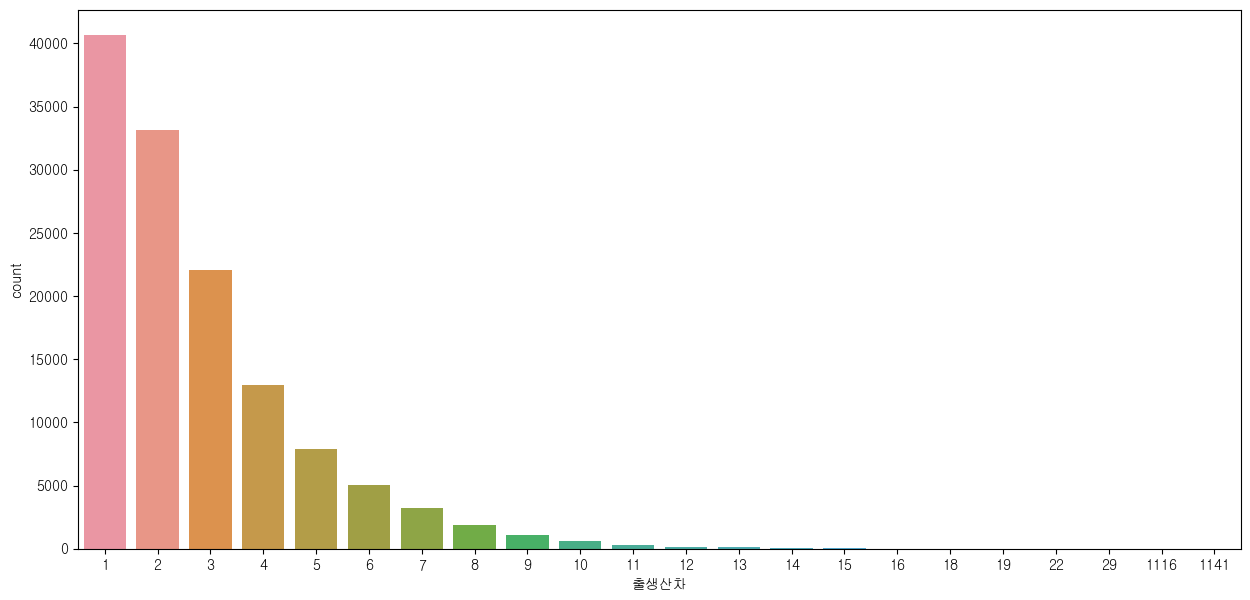

In [98]:
plt.figure(figsize=(15, 7))  

sns.countplot(x='출생산차', data=data4)
plt.show()

In [99]:
df.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD 근내', 'EPD 냉도체중', 'KPN체고',
       'KPN체장', '실제 도축 도체중', '실제 도축 근내지방', '근내환산점수', '도축단가가산점수', '개월령의 근내평균',
       '개월령의 도체중평균', '개월령의 도체범위의 근내평균', '개월령의 도체범위의 도체중평균', '형매근내평균가산점수',
       '거세우 형매 도축 단가 가산 평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수'],
      dtype='object')

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
목장코드,278127.0,302595.856102,142271.505433,1571.0000,150143.0000,344435.0000,434577.0000,706145.0000
도축개월령,278127.0,30.322115,2.553793,7.0000,29.0000,30.0000,32.0000,138.0000
생시체중,278127.0,813.180090,104.318297,134.0000,752.0000,814.0000,879.0000,2189.0000
출생산차,278127.0,3.343915,342.134740,1.0000,1.0000,2.0000,3.0000,180425.0000
EPD 근내,278127.0,0.395224,0.404278,-1.1338,0.1110,0.3704,0.6119,1.6087
EPD 냉도체중,278127.0,12.342964,10.084379,-18.4743,4.6455,13.3421,18.0989,58.3984
KPN체고,278127.0,131.392727,2.736552,0.0000,129.7000,131.4000,133.3000,138.8000
KPN체장,278127.0,151.772937,5.378027,0.0000,147.7000,152.2000,156.4000,164.2000
실제 도축 도체중,278127.0,455.360947,58.418637,75.0000,421.0000,456.0000,492.0000,1226.0000
실제 도축 근내지방,278127.0,6.077263,1.960400,0.0000,5.0000,6.0000,8.0000,9.0000


In [101]:
print(df['근내환산점수'].value_counts())
print(df['근내환산점수'].value_counts()/len(df['근내환산점수']))

5    101658
4     86465
3     62392
2     25347
1      2092
0       173
Name: 근내환산점수, dtype: int64
5    0.365509
4    0.310883
3    0.224329
2    0.091135
1    0.007522
0    0.000622
Name: 근내환산점수, dtype: float64


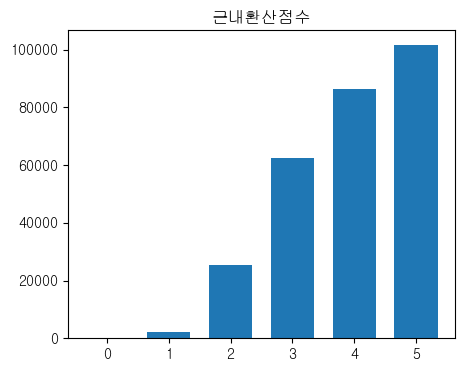

In [102]:
plt.figure(figsize=(5, 4))
plt.bar(df['근내환산점수'].value_counts().index, df['근내환산점수'].value_counts(), width=0.7)

plt.title('근내환산점수')
plt.show()

In [103]:
print(df['출생산차'].value_counts())
print(df['출생산차'].value_counts()/len(df['출생산차']))


1         91891
2         70145
3         46604
4         28179
5         17155
6         10444
7          5943
8          3320
9          1968
10         1132
11          646
12          363
13          166
14           87
15           47
16           14
17           12
18            3
970           1
40            1
27            1
24            1
31            1
969           1
180425        1
1181          1
Name: 출생산차, dtype: int64
1         0.330392
2         0.252205
3         0.167564
4         0.101317
5         0.061680
6         0.037551
7         0.021368
8         0.011937
9         0.007076
10        0.004070
11        0.002323
12        0.001305
13        0.000597
14        0.000313
15        0.000169
16        0.000050
17        0.000043
18        0.000011
970       0.000004
40        0.000004
27        0.000004
24        0.000004
31        0.000004
969       0.000004
180425    0.000004
1181      0.000004
Name: 출생산차, dtype: float64


In [104]:
print(data4['출생산차'].value_counts())
print(data4['출생산차'].value_counts()/len(data4['출생산차']))

1       40629
2       33152
3       22054
4       12942
5        7872
6        5030
7        3220
8        1838
9        1050
10        617
11        313
12        163
13        108
14         36
15         19
16          7
18          1
22          1
29          1
1141        1
1116        1
19          1
Name: 출생산차, dtype: int64
1       0.314817
2       0.256881
3       0.170887
4       0.100282
5       0.060997
6       0.038975
7       0.024950
8       0.014242
9       0.008136
10      0.004781
11      0.002425
12      0.001263
13      0.000837
14      0.000279
15      0.000147
16      0.000054
18      0.000008
22      0.000008
29      0.000008
1141    0.000008
1116    0.000008
19      0.000008
Name: 출생산차, dtype: float64


In [105]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
목장코드,129056.0,328926.319985,141683.438084,1599.0000,216119.0000,383153.0000,455935.0000,801277.0000
도축개월령,129056.0,31.074781,2.545768,7.0000,30.0000,31.0000,32.0000,67.0000
생시체중,129056.0,834.853536,109.421347,123.0000,768.0000,836.0000,904.0000,1996.0000
출생산차,129056.0,2.768690,4.846732,1.0000,1.0000,2.0000,4.0000,1141.0000
EPD 근내,129056.0,0.416917,0.377880,-0.8860,0.1110,0.4075,0.7467,1.6087
EPD 냉도체중,129056.0,17.704162,11.278236,-18.4743,9.6251,16.4523,24.3619,58.3984
KPN체고,129056.0,132.534169,3.073333,0.0000,130.7000,132.7000,134.5000,140.2000
KPN체장,129056.0,154.487380,4.607944,0.0000,152.9000,155.4000,157.6000,164.2000
실제 도축 도체중,129056.0,467.497861,61.275242,69.0000,430.0000,468.0000,506.0000,1118.0000
실제 도축 근내지방,129056.0,6.240291,1.956723,0.0000,5.0000,6.0000,8.0000,9.0000


5    51805
4    38811
3    27684
2     9759
1      928
0       69
Name: 근내환산점수, dtype: int64
5    0.401415
4    0.300730
3    0.214512
2    0.075618
1    0.007191
0    0.000535
Name: 근내환산점수, dtype: float64


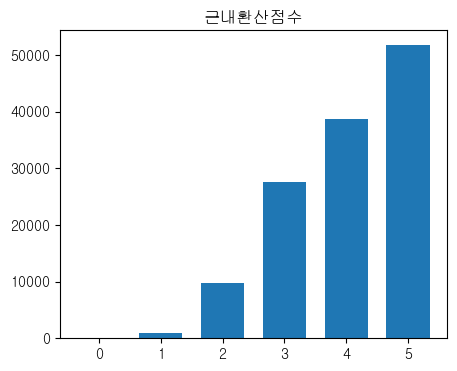

In [106]:
print(data4['근내환산점수'].value_counts())
print(data4['근내환산점수'].value_counts()/len(data4['근내환산점수']))

plt.figure(figsize=(5, 4))
plt.bar(data4['근내환산점수'].value_counts().index, data4['근내환산점수'].value_counts(), width=0.7)

plt.title('근내환산점수')
plt.show()

# 데이터 전처리

## 변수변환 - target 1,2,3 만들기

In [107]:
df.근내환산점수.value_counts()

5    101658
4     86465
3     62392
2     25347
1      2092
0       173
Name: 근내환산점수, dtype: int64

In [108]:
train = pd.read_csv('../data/train.csv', encoding='cp949')

In [109]:
# target1, 2, 3 만들기
train_copy = train.copy()
train_copy['target1'] = train_copy['근내환산점수'].apply(lambda x: 1 if 5 == x else 0)
train_copy['target2'] = train_copy['근내환산점수'].apply(lambda x: 1 if 4 <= x else 0)
train_copy['target3'] = train_copy['근내환산점수'].apply(lambda x: 1 if 3 <= x else 0)

In [110]:
data4['target1'] = data4['근내환산점수'].apply(lambda x: 1 if 5 == x else 0)
data4['target2'] = data4['근내환산점수'].apply(lambda x: 1 if 4 <= x else 0)
data4['target3'] = data4['근내환산점수'].apply(lambda x: 1 if 3 <= x else 0)

In [111]:
# 확인
print('target1 확인')
print(train_copy['target1'].value_counts())
print(len(train_copy[train_copy['근내환산점수']==5]))
print(('\n'))
print('target2 확인')
print(train_copy['target2'].value_counts())
print(len(train_copy[train_copy['근내환산점수']>=4]))
print(('\n'))
print('target3 확인')
print(train_copy['target3'].value_counts())
print(len(train_copy[train_copy['근내환산점수']>=3]))

target1 확인
0    176469
1    101658
Name: target1, dtype: int64
101658


target2 확인
1    188123
0     90004
Name: target2, dtype: int64
188123


target3 확인
1    250515
0     27612
Name: target3, dtype: int64
250515


In [112]:
# train_copy.to_csv('../data/train.csv', index=False, encoding='cp949')

## 변수 선택
- 없앨거: 실제 도축 근내지방, 근내환산점수, 출생월  
- Target변수: target1, 2, 3
- id변수: 목장코드
> Numeric
- 도축개월령, 생시체중, EPD근내, EPD 냉도체중, KPN체고, KPN체장, 실제 도축 도체중,
    도축단가가산점수, 개월령의 근내평균, 개월령의 도체중평균, 개월령의 도체범위의 근내평균, 
    개월령의 도체범위의 도체중평균, 형매근내평균가산점수, 거세우 형매 도축 단가 가산 평균, 어미형매근내평균가산점수,
    외할미형매근내평균가산점수, 농가근내평균가산점수, 농가도체중평균가산점수

> Categorical
- 도축개월령, 출생산차

In [113]:
train = pd.read_csv('../data/train.csv', encoding='cp949')
train.shape

(278127, 26)

In [114]:
train_copy = train.copy()
train_copy.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD 근내', 'EPD 냉도체중', 'KPN체고',
       'KPN체장', '실제 도축 도체중', '실제 도축 근내지방', '근내환산점수', '도축단가가산점수', '개월령의 근내평균',
       '개월령의 도체중평균', '개월령의 도체범위의 근내평균', '개월령의 도체범위의 도체중평균', '형매근내평균가산점수',
       '거세우 형매 도축 단가 가산 평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수', 'target1', 'target2', 'target3'],
      dtype='object')

### t-test, $$ t(df) = t값, \quad p = p값 $$

In [115]:
from scipy.stats import ttest_ind

In [116]:
variables = [
    '도축개월령', '생시체중', 'EPD근내', 'EPD냉도체중', 'KPN체고', 'KPN체장', '실제도축도체중',
    '도축단가가산점수', '개월령의근내평균', '개월령의도체중평균', '개월령의도체범위의근내평균',
    '개월령의도체범위의도체중평균', '형매근내평균가산점수', '거세우형매도축단가가산평균',
    '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수', '농가도체중평균가산점수','출생산차'
]

# Perform t-tests and store results
ttest_results = {}
for variable in variables:
    group1 = train_copy[train_copy['target1'] == 1][variable]
    group0 = train_copy[train_copy['target1'] == 0][variable]
    
    # Perform the t-test and get the t-statistic and p-value
    t_stat, p_value = ttest_ind(group1.dropna(), group0.dropna(), equal_var=False)
    
    # Store the results
    ttest_results[variable] = {'t-statistic': t_stat, 'p-value': p_value}

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Variable', 't-statistic', 'p-value'])

# Perform t-tests and store results
for variable, result in ttest_results.items():
    result_df = result_df.append({'Variable': variable, 't-statistic': result['t-statistic'], 'p-value': result['p-value']}, ignore_index=True)

# Print the results
for variable, result in ttest_results.items():
    print(f"{variable}: t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")
    
result_df

KeyError: 'EPD근내'

In [ ]:
variables = [
    '도축개월령', '생시체중', 'EPD근내', 'EPD냉도체중', 'KPN체고', 'KPN체장', '실제도축도체중',
    '도축단가가산점수', '개월령의근내평균', '개월령의도체중평균', '개월령의도체범위의근내평균',
    '개월령의도체범위의도체중평균', '형매근내평균가산점수', '거세우형매도축단가가산평균',
    '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수', '농가도체중평균가산점수'
]

# Perform t-tests and store results
ttest_results = {}
for variable in variables:
    group1 = train_copy[train_copy['target1'] == 1][variable]
    group0 = train_copy[train_copy['target1'] == 0][variable]
    
    # Perform the t-test and get the t-statistic and p-value
    t_stat, p_value = ttest_ind(group1.dropna(), group0.dropna(), equal_var=False)
    
    # Store the results
    ttest_results[variable] = {'t-statistic': t_stat, 'p-value': p_value}

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Variable', 't-statistic', 'p-value'])

# Perform t-tests and store results
for variable, result in ttest_results.items():
    result_df = result_df.append({'Variable': variable, 't-statistic': result['t-statistic'], 'p-value': result['p-value']}, ignore_index=True)

# Print the results
for variable, result in ttest_results.items():
    print(f"{variable}: t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")
    
result_df

도축개월령: t-statistic = 58.488, p-value = 0.000
생시체중: t-statistic = 123.247, p-value = 0.000
EPD근내: t-statistic = 98.625, p-value = 0.000
EPD냉도체중: t-statistic = 10.333, p-value = 0.000
KPN체고: t-statistic = 7.898, p-value = 0.000
KPN체장: t-statistic = -1.475, p-value = 0.140
실제도축도체중: t-statistic = 123.245, p-value = 0.000
도축단가가산점수: t-statistic = 18.237, p-value = 0.000
개월령의근내평균: t-statistic = 152.232, p-value = 0.000
개월령의도체중평균: t-statistic = 75.029, p-value = 0.000
개월령의도체범위의근내평균: t-statistic = 169.599, p-value = 0.000
개월령의도체범위의도체중평균: t-statistic = 108.600, p-value = 0.000
형매근내평균가산점수: t-statistic = 65.519, p-value = 0.000
거세우형매도축단가가산평균: t-statistic = 16.790, p-value = 0.000
어미형매근내평균가산점수: t-statistic = 30.237, p-value = 0.000
외할미형매근내평균가산점수: t-statistic = 12.544, p-value = 0.000
농가근내평균가산점수: t-statistic = 64.881, p-value = 0.000
농가도체중평균가산점수: t-statistic = 29.513, p-value = 0.000


,Variable,t-statistic,p-value
0,도축개월령,58.488401,0.000000e+00
1,생시체중,123.246667,0.000000e+00
2,EPD근내,98.624660,0.000000e+00
3,EPD냉도체중,10.332794,5.080444e-25
4,KPN체고,7.898287,2.840523e-15
5,KPN체장,-1.474637,1.403116e-01
6,실제도축도체중,123.244510,0.000000e+00
7,도축단가가산점수,18.237362,3.178294e-74
8,개월령의근내평균,152.232304,0.000000e+00
9,개월령의도체중평균,75.029169,0.000000e+00


In [ ]:
variables = [
    '도축개월령', '생시체중', 'EPD근내', 'EPD냉도체중', 'KPN체고', 'KPN체장', '실제도축도체중',
    '도축단가가산점수', '개월령의근내평균', '개월령의도체중평균', '개월령의도체범위의근내평균',
    '개월령의도체범위의도체중평균', '형매근내평균가산점수', '거세우형매도축단가가산평균',
    '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수', '농가도체중평균가산점수','출생산차'
]

# Perform t-tests and store results
ttest_results = {}
for variable in variables:
    group1 = train_copy[train_copy['target2'] == 1][variable]
    group0 = train_copy[train_copy['target2'] == 0][variable]
    
    # Perform the t-test and get the t-statistic and p-value
    t_stat, p_value = ttest_ind(group1.dropna(), group0.dropna(), equal_var=False)
    
    # Store the results
    ttest_results[variable] = {'t-statistic': t_stat, 'p-value': p_value}

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Variable', 't-statistic', 'p-value'])

# Perform t-tests and store results
for variable, result in ttest_results.items():
    result_df = result_df.append({'Variable': variable, 't-statistic': result['t-statistic'], 'p-value': result['p-value']}, ignore_index=True)

# Print the results
for variable, result in ttest_results.items():
    print(f"{variable}: t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")
    
result_df

도축개월령: t-statistic = 61.151, p-value = 0.000
생시체중: t-statistic = 122.725, p-value = 0.000
EPD근내: t-statistic = 93.339, p-value = 0.000
EPD냉도체중: t-statistic = 1.306, p-value = 0.191
KPN체고: t-statistic = 2.782, p-value = 0.005
KPN체장: t-statistic = -7.858, p-value = 0.000
실제도축도체중: t-statistic = 122.727, p-value = 0.000
도축단가가산점수: t-statistic = 12.946, p-value = 0.000
개월령의근내평균: t-statistic = 137.904, p-value = 0.000
개월령의도체중평균: t-statistic = 67.398, p-value = 0.000
개월령의도체범위의근내평균: t-statistic = 155.548, p-value = 0.000
개월령의도체범위의도체중평균: t-statistic = 103.964, p-value = 0.000
형매근내평균가산점수: t-statistic = 61.897, p-value = 0.000
거세우형매도축단가가산평균: t-statistic = 13.440, p-value = 0.000
어미형매근내평균가산점수: t-statistic = 28.169, p-value = 0.000
외할미형매근내평균가산점수: t-statistic = 10.002, p-value = 0.000
농가근내평균가산점수: t-statistic = 60.427, p-value = 0.000
농가도체중평균가산점수: t-statistic = 29.947, p-value = 0.000
출생산차: t-statistic = 0.748, p-value = 0.454


,Variable,t-statistic,p-value
0,도축개월령,61.150902,0.000000e+00
1,생시체중,122.725048,0.000000e+00
2,EPD근내,93.339116,0.000000e+00
3,EPD냉도체중,1.306443,1.914034e-01
4,KPN체고,2.782450,5.395580e-03
5,KPN체장,-7.857860,3.929773e-15
6,실제도축도체중,122.727363,0.000000e+00
7,도축단가가산점수,12.945766,2.561079e-38
8,개월령의근내평균,137.904090,0.000000e+00
9,개월령의도체중평균,67.397855,0.000000e+00


In [ ]:
variables = [
    '도축개월령', '생시체중', 'EPD근내', 'EPD냉도체중', 'KPN체고', 'KPN체장', '실제도축도체중',
    '도축단가가산점수', '개월령의근내평균', '개월령의도체중평균', '개월령의도체범위의근내평균',
    '개월령의도체범위의도체중평균', '형매근내평균가산점수', '거세우형매도축단가가산평균',
    '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수', '농가도체중평균가산점수'
]

# Perform t-tests and store results
ttest_results = {}
for variable in variables:
    group1 = train_copy[train_copy['target2'] == 1][variable]
    group0 = train_copy[train_copy['target2'] == 0][variable]
    
    # Perform the t-test and get the t-statistic and p-value
    t_stat, p_value = ttest_ind(group1.dropna(), group0.dropna(), equal_var=False)
    
    # Store the results
    ttest_results[variable] = {'t-statistic': t_stat, 'p-value': p_value}

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Variable', 't-statistic', 'p-value'])

# Perform t-tests and store results
for variable, result in ttest_results.items():
    result_df = result_df.append({'Variable': variable, 't-statistic': result['t-statistic'], 'p-value': result['p-value']}, ignore_index=True)

# Print the results
for variable, result in ttest_results.items():
    print(f"{variable}: t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")
    
result_df

도축개월령: t-statistic = 61.151, p-value = 0.000
생시체중: t-statistic = 122.725, p-value = 0.000
EPD근내: t-statistic = 93.339, p-value = 0.000
EPD냉도체중: t-statistic = 1.306, p-value = 0.191
KPN체고: t-statistic = 2.782, p-value = 0.005
KPN체장: t-statistic = -7.858, p-value = 0.000
실제도축도체중: t-statistic = 122.727, p-value = 0.000
도축단가가산점수: t-statistic = 12.946, p-value = 0.000
개월령의근내평균: t-statistic = 137.904, p-value = 0.000
개월령의도체중평균: t-statistic = 67.398, p-value = 0.000
개월령의도체범위의근내평균: t-statistic = 155.548, p-value = 0.000
개월령의도체범위의도체중평균: t-statistic = 103.964, p-value = 0.000
형매근내평균가산점수: t-statistic = 61.897, p-value = 0.000
거세우형매도축단가가산평균: t-statistic = 13.440, p-value = 0.000
어미형매근내평균가산점수: t-statistic = 28.169, p-value = 0.000
외할미형매근내평균가산점수: t-statistic = 10.002, p-value = 0.000
농가근내평균가산점수: t-statistic = 60.427, p-value = 0.000
농가도체중평균가산점수: t-statistic = 29.947, p-value = 0.000


,Variable,t-statistic,p-value
0,도축개월령,61.150902,0.000000e+00
1,생시체중,122.725048,0.000000e+00
2,EPD근내,93.339116,0.000000e+00
3,EPD냉도체중,1.306443,1.914034e-01
4,KPN체고,2.782450,5.395580e-03
5,KPN체장,-7.857860,3.929773e-15
6,실제도축도체중,122.727363,0.000000e+00
7,도축단가가산점수,12.945766,2.561079e-38
8,개월령의근내평균,137.904090,0.000000e+00
9,개월령의도체중평균,67.397855,0.000000e+00


In [ ]:
variables = [
    '도축개월령', '생시체중', 'EPD근내', 'EPD냉도체중', 'KPN체고', 'KPN체장', '실제도축도체중',
    '도축단가가산점수', '개월령의근내평균', '개월령의도체중평균', '개월령의도체범위의근내평균',
    '개월령의도체범위의도체중평균', '형매근내평균가산점수', '거세우형매도축단가가산평균',
    '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수', '농가도체중평균가산점수','출생산차'
]

# Perform t-tests and store results
ttest_results = {}
for variable in variables:
    group1 = train_copy[train_copy['target3'] == 1][variable]
    group0 = train_copy[train_copy['target3'] == 0][variable]
    
    # Perform the t-test and get the t-statistic and p-value
    t_stat, p_value = ttest_ind(group1.dropna(), group0.dropna(), equal_var=False)
    
    # Store the results
    ttest_results[variable] = {'t-statistic': t_stat, 'p-value': p_value}

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Variable', 't-statistic', 'p-value'])

# Perform t-tests and store results
for variable, result in ttest_results.items():
    result_df = result_df.append({'Variable': variable, 't-statistic': result['t-statistic'], 'p-value': result['p-value']}, ignore_index=True)

# Print the results
for variable, result in ttest_results.items():
    print(f"{variable}: t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")
    
result_df

도축개월령: t-statistic = 54.537, p-value = 0.000
생시체중: t-statistic = 105.060, p-value = 0.000
EPD근내: t-statistic = 61.849, p-value = 0.000
EPD냉도체중: t-statistic = -2.925, p-value = 0.003
KPN체고: t-statistic = -1.727, p-value = 0.084
KPN체장: t-statistic = -10.109, p-value = 0.000
실제도축도체중: t-statistic = 105.060, p-value = 0.000
도축단가가산점수: t-statistic = 16.137, p-value = 0.000
개월령의근내평균: t-statistic = 93.538, p-value = 0.000
개월령의도체중평균: t-statistic = 52.930, p-value = 0.000
개월령의도체범위의근내평균: t-statistic = 114.557, p-value = 0.000
개월령의도체범위의도체중평균: t-statistic = 86.206, p-value = 0.000
형매근내평균가산점수: t-statistic = 40.987, p-value = 0.000
거세우형매도축단가가산평균: t-statistic = 8.210, p-value = 0.000
어미형매근내평균가산점수: t-statistic = 17.451, p-value = 0.000
외할미형매근내평균가산점수: t-statistic = 5.539, p-value = 0.000
농가근내평균가산점수: t-statistic = 41.051, p-value = 0.000
농가도체중평균가산점수: t-statistic = 27.391, p-value = 0.000
출생산차: t-statistic = 0.695, p-value = 0.487


,Variable,t-statistic,p-value
0,도축개월령,54.537202,0.000000e+00
1,생시체중,105.059791,0.000000e+00
2,EPD근내,61.849497,0.000000e+00
3,EPD냉도체중,-2.925199,3.444602e-03
4,KPN체고,-1.726947,8.418584e-02
5,KPN체장,-10.109274,5.435076e-24
6,실제도축도체중,105.060355,0.000000e+00
7,도축단가가산점수,16.136618,2.286644e-58
8,개월령의근내평균,93.537670,0.000000e+00
9,개월령의도체중평균,52.930219,0.000000e+00


In [ ]:
200,000+50,000+50,000+79,000+5,900+100,000+208,000+100,000+106,000+150,000

1048900

In [ ]:
variables = [
    '도축개월령', '생시체중', 'EPD근내', 'EPD냉도체중', 'KPN체고', 'KPN체장', '실제도축도체중',
    '도축단가가산점수', '개월령의근내평균', '개월령의도체중평균', '개월령의도체범위의근내평균',
    '개월령의도체범위의도체중평균', '형매근내평균가산점수', '거세우형매도축단가가산평균',
    '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수', '농가도체중평균가산점수'
]

# Perform t-tests and store results
ttest_results = {}
for variable in variables:
    group1 = train_copy[train_copy['target3'] == 1][variable]
    group0 = train_copy[train_copy['target3'] == 0][variable]
    
    # Perform the t-test and get the t-statistic and p-value
    t_stat, p_value = ttest_ind(group1.dropna(), group0.dropna(), equal_var=False)
    
    # Store the results
    ttest_results[variable] = {'t-statistic': t_stat, 'p-value': p_value}

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Variable', 't-statistic', 'p-value'])

# Perform t-tests and store results
for variable, result in ttest_results.items():
    result_df = result_df.append({'Variable': variable, 't-statistic': result['t-statistic'], 'p-value': result['p-value']}, ignore_index=True)

# Print the results
for variable, result in ttest_results.items():
    print(f"{variable}: t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")
    
result_df

도축개월령: t-statistic = 54.537, p-value = 0.000
생시체중: t-statistic = 105.060, p-value = 0.000
EPD근내: t-statistic = 61.849, p-value = 0.000
EPD냉도체중: t-statistic = -2.925, p-value = 0.003
KPN체고: t-statistic = -1.727, p-value = 0.084
KPN체장: t-statistic = -10.109, p-value = 0.000
실제도축도체중: t-statistic = 105.060, p-value = 0.000
도축단가가산점수: t-statistic = 16.137, p-value = 0.000
개월령의근내평균: t-statistic = 93.538, p-value = 0.000
개월령의도체중평균: t-statistic = 52.930, p-value = 0.000
개월령의도체범위의근내평균: t-statistic = 114.557, p-value = 0.000
개월령의도체범위의도체중평균: t-statistic = 86.206, p-value = 0.000
형매근내평균가산점수: t-statistic = 40.987, p-value = 0.000
거세우형매도축단가가산평균: t-statistic = 8.210, p-value = 0.000
어미형매근내평균가산점수: t-statistic = 17.451, p-value = 0.000
외할미형매근내평균가산점수: t-statistic = 5.539, p-value = 0.000
농가근내평균가산점수: t-statistic = 41.051, p-value = 0.000
농가도체중평균가산점수: t-statistic = 27.391, p-value = 0.000


,Variable,t-statistic,p-value
0,도축개월령,54.537202,0.000000e+00
1,생시체중,105.059791,0.000000e+00
2,EPD근내,61.849497,0.000000e+00
3,EPD냉도체중,-2.925199,3.444602e-03
4,KPN체고,-1.726947,8.418584e-02
5,KPN체장,-10.109274,5.435076e-24
6,실제도축도체중,105.060355,0.000000e+00
7,도축단가가산점수,16.136618,2.286644e-58
8,개월령의근내평균,93.537670,0.000000e+00
9,개월령의도체중평균,52.930219,0.000000e+00


In [ ]:
train_copy[(train_copy['출생산차']==180425)|(train_copy['출생산차']==1181)|(train_copy['출생산차']==970)|(train_copy['출생산차']==969)]

,목장코드,출생월,도축개월령,생시체중,출생산차,EPD 근내,EPD 냉도체중,KPN체고,KPN체장,실제 도축 도체중,...,개월령의 도체범위의 도체중평균,형매근내평균가산점수,거세우 형매 도축 단가 가산 평균,어미형매근내평균가산점수,외할미형매근내평균가산점수,농가근내평균가산점수,농가도체중평균가산점수,target1,target2,target3
2178,400706,2017-07-21,30,834,970,0.3595,19.1362,131.4,158.9,467,...,473.24,0.00,0,0.0000,0.0,0.0,0.0,0,0,1
122341,459888,2019-05-05,28,850,969,0.5409,-10.1537,129.6,151.3,476,...,471.27,2.06,0,0.0000,0.0,0.0,0.0,0,1,1
134156,377402,2019-03-28,30,966,180425,-0.0520,3.2067,133.7,157.4,541,...,527.57,0.00,0,-0.4667,0.0,0.0,0.0,1,1,1
245290,459055,2020-03-25,31,720,1181,-0.1671,21.7994,132.3,154.3,403,...,429.34,0.00,0,-0.5558,0.0,0.0,0.0,0,0,1


In [ ]:
train_copy['출생산차'].unique()

array([     2,      5,      4,      7,      1,      3,      6,      9,
            8,     10,     11,     14,     12,     13,    970,     15,
           17,     16,     40,     27,     24,     31,    969, 180425,
           18,   1181], dtype=int64)

### χ²검정, $$ \chi^2(df) = 카이제곱 통계량, \quad p = p값 $$

Chi-square statistic: 813.2380242227678
p-value: 1.9474634523318774e-155


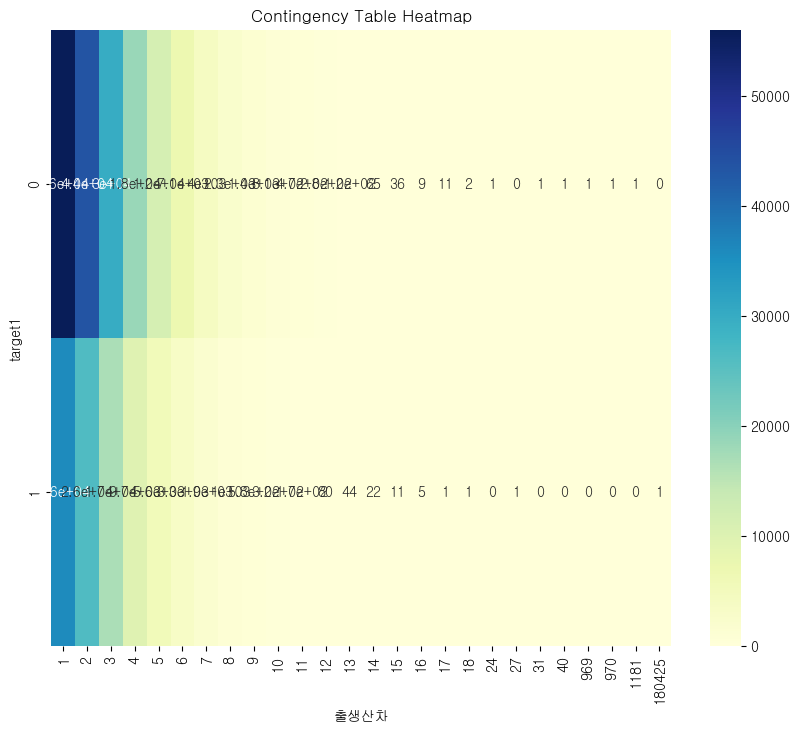

In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns

# Create a contingency table
contingency_table = pd.crosstab(train_copy['target1'], train_copy['출생산차'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

import matplotlib.pyplot as plt

# Create a heatmap of the contingency_table
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title("Contingency Table Heatmap")
plt.xlabel("출생산차")
plt.ylabel("target1")
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_copy['target2'], train_copy['출생산차'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 855.6038622694759
p-value: 2.2021929665636675e-164


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_copy['target3'], train_copy['출생산차'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 386.50375625629766
p-value: 1.78842269321071e-66


## 모델링

In [ ]:
train_2 = train_copy[(train_copy['출생산차']!=180425)|(train_copy['출생산차']!=1181)|(train_copy['출생산차']!=970)|(train_copy['출생산차']!=969)].copy()

In [ ]:
train_copy = train_copy.rename(columns=lambda x: x.replace(' ', ''))
train_copy.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD근내', 'EPD냉도체중', 'KPN체고',
       'KPN체장', '실제도축도체중', '실제도축근내지방', '근내환산점수', '도축단가가산점수', '개월령의근내평균',
       '개월령의도체중평균', '개월령의도체범위의근내평균', '개월령의도체범위의도체중평균', '형매근내평균가산점수',
       '거세우형매도축단가가산평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수', 'target1', 'target2', 'target3'],
      dtype='object')

In [ ]:
train_2 = train_2.rename(columns=lambda x: x.replace(' ', ''))
train_2.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD근내', 'EPD냉도체중', 'KPN체고',
       'KPN체장', '실제도축도체중', '실제도축근내지방', '근내환산점수', '도축단가가산점수', '개월령의근내평균',
       '개월령의도체중평균', '개월령의도체범위의근내평균', '개월령의도체범위의도체중평균', '형매근내평균가산점수',
       '거세우형매도축단가가산평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수', 'target1', 'target2', 'target3'],
      dtype='object')

In [ ]:
data4 = data4.rename(columns=lambda x: x.replace(' ', ''))
data4.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD근내', 'EPD냉도체중', 'KPN체고',
       'KPN체장', '실제도축도체중', '실제도축근내지방', '근내환산점수', '도축단가가산점수', '개월령의근내평균',
       '개월령의도체중평균', '개월령의도체범위의근내평균', '개월령의도체범위의도체중평균', '형매근내평균가산점수',
       '거세우형매도축단가가산평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수', 'target1', 'target2', 'target3'],
      dtype='object')

### target1

In [ ]:
model2 = sm.Logit.from_formula(""" target1 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + 형매근내평균가산점수+ 거세우형매도축단가가산평균 + 어미형매근내평균가산점수 
                              + 외할미형매근내평균가산점수+ 농가근내평균가산점수 
                              + 농가도체중평균가산점수 + 출생산차 """, train_2).fit()

model2.summary()

Optimization terminated successfully.
         Current function value: 0.580859
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target1   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277485
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1156
Time:                        15:21:00   Log-Likelihood:            -1.6119e+05
converged:                       True   LL-Null:                   -1.8226e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -6.5652      0.256    -25.691      0.000      -7.066      -6.064
도축개월령              0.0114      0.002      4.826      0.000       0.007       0.016
생시체중               0.0054   9.34e-05     58.317      0.000       0.005       0.006
EPD근내              0.0010      0.015      0.066      0.948      -0.029       0.031
EPD냉도체중            0.0030      0.001      4.751      0.000       0.002       0.004
KPN체고           1.012e-05      0.002      0.004      0.996      -0.004       0.005
KPN체장              0.0003      0.001      0.269      0.788      -0.002       0.002
개월령의근내평균           0.3401      0.024     14.152      0.000       0.293       0.387
개월령의도체중평균         -0.0042      0.000    -10.830      0.000      -0.005      -0.003
개월령의도체범위의근내평균      0.7144      0.021     33.987      0.000       0.673       0.756
개월령의도체범위의도체중평균    -0.0076      0.000    -27.677      0.000      -0.008      -0.007
형매근내평균가산점수         0.2228      0.004     58.349      0.000       0.215       0.230
거세우형매도축단가가산평균   3.738e-05   4.41e-06      8.483      0.000    2.87e-05     4.6e-05
어미형매근내평균가산점수       0.3192      0.014     23.193      0.000       0.292       0.346
외할미형매근내평균가산점수      0.2452      0.029      8.389      0.000       0.188       0.302
농가근내평균가산점수         0.3209      0.006     53.826      0.000       0.309       0.333
농가도체중평균가산점수        0.0003      0.000      1.701      0.089   -4.71e-05       0.001
출생산차             1.69e-05      2e-05      0.845      0.398   -2.23e-05    5.61e-05
==================================================================================
"""

#### train_2, train 성능 보기

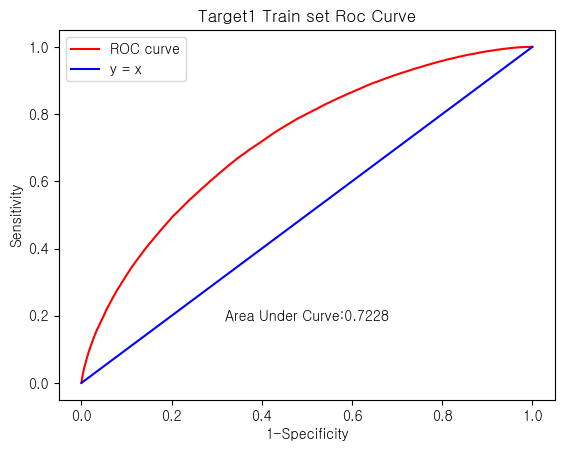

In [ ]:
tr_pred2 = model2.predict(train_2)
tr_pred2

train_2['tr_pred2'] = tr_pred2

cal2 = train_2.copy()

cal2.dropna(subset=['tr_pred2'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2['target1'], cal2['tr_pred2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2['target1'], cal2['tr_pred2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target1 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
cal2['prob_5'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2['prob_6'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2['prob_7'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2['prob_8'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2['prob_9'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2['prob_85'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2[cal2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(cal2[cal2['target1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2[cal2['tr_pred2']>=0.5])}")
print(f"prob_5개수:{len(cal2[cal2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2[cal2['tr_pred2']>=0.6])}")
print(f"prob_6개수:{len(cal2[cal2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2[cal2['tr_pred2']>=0.7])}")
print(f"prob_7개수:{len(cal2[cal2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2[cal2['tr_pred2']>=0.8])}")
print(f"prob_8개수:{len(cal2[cal2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2[cal2['tr_pred2']>=0.9])}")
print(f"prob_9개수:{len(cal2[cal2['prob_9']==1])}")

5이상개수:101564
TARGET1개수:101564
0.5이상개수:65198
prob_5개수:65198
0.6이상개수:33352
prob_6개수:33352
0.7이상개수:13073
prob_7개수:13073
0.8이상개수:3105
prob_8개수:3105
0.9이상개수:229
prob_9개수:229


#### confusion matirx, train_2

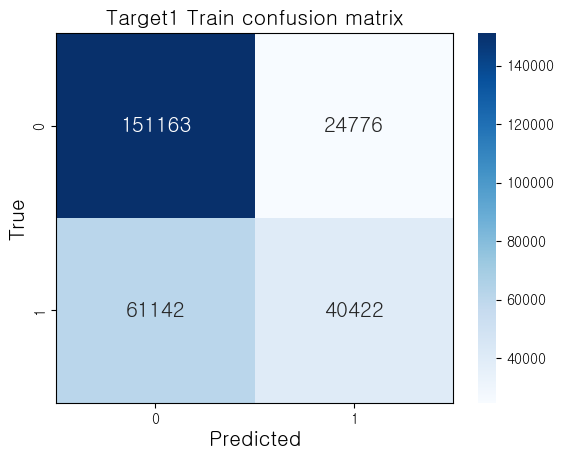

In [ ]:
# cut-off 0.5
cm = confusion_matrix(cal2['target1'], cal2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target1 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [ ]:
perfo(cal2['target1'], cal2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.3979953526840219,
 'Specificity': 0.8591784652635288,
 'Precision': 0.6199883432007117,
 'Accuracy': 0.6903889327322588,
 'F-beta Score': 0.48478670200645235}

#### train_2, test 성능 보기

In [ ]:
val = data4[(data4['출생산차']!=1141)|(data4['출생산차']!=1116)].copy()

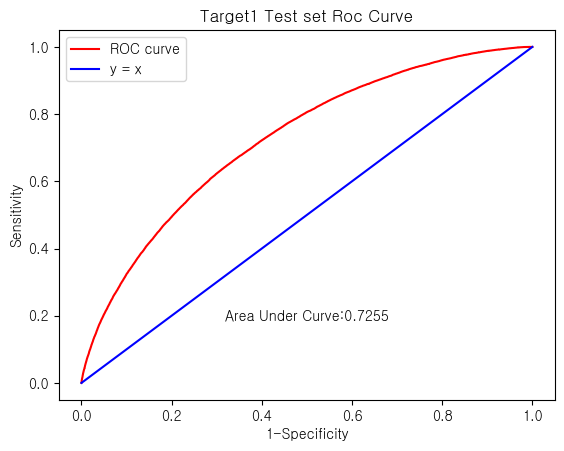

In [ ]:
val_pred2 = model2.predict(val)
val_copy2 = val.copy()
val_copy2['val_pred2'] = val_pred2

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2['target1'], val_copy2['val_pred2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2['target1'], val_copy2['val_pred2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target1 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
val_copy2['prob_5'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2['prob_6'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2['prob_7'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2['prob_8'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2['prob_9'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2['prob_85'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2[val_copy2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(val_copy2[val_copy2['target1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.5])}")
print(f"prob_5개수:{len(val_copy2[val_copy2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.6])}")
print(f"prob_6개수:{len(val_copy2[val_copy2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.7])}")
print(f"prob_7개수:{len(val_copy2[val_copy2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.8])}")
print(f"prob_8개수:{len(val_copy2[val_copy2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.9])}")
print(f"prob_9개수:{len(val_copy2[val_copy2['prob_9']==1])}")

5이상개수:51805
TARGET1개수:51805
0.5이상개수:38856
prob_5개수:38856
0.6이상개수:20559
prob_6개수:20559
0.7이상개수:8446
prob_7개수:8446
0.8이상개수:2296
prob_8개수:2296
0.9이상개수:240
prob_9개수:240


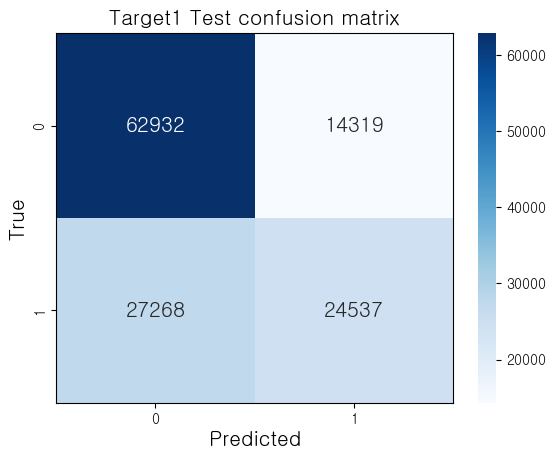

In [ ]:
# cut-off 0.5
cm = confusion_matrix(val_copy2['target1'], val_copy2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target1 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [ ]:
perfo(val_copy2['target1'], val_copy2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.4736415403918541,
 'Specificity': 0.8146431761401147,
 'Precision': 0.631485484867202,
 'Accuracy': 0.677760042152244,
 'F-beta Score': 0.5412911836401539}

In [ ]:
val_copy2.to_csv('../result/validation_target1.csv', encoding='cp949', index=False)

### target2

In [ ]:
model2_target2 = sm.Logit.from_formula(""" target2 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + 형매근내평균가산점수+ 거세우형매도축단가가산평균 + 어미형매근내평균가산점수 
                              + 외할미형매근내평균가산점수+ 농가근내평균가산점수 
                              + 농가도체중평균가산점수 + 출생산차 """, train_2).fit()

model2_target2.summary()

Optimization terminated successfully.
         Current function value: 0.551298
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target2   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277485
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1235
Time:                        15:25:00   Log-Likelihood:            -1.5299e+05
converged:                       True   LL-Null:                   -1.7455e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.1307      0.245    -20.960      0.000      -5.610      -4.651
도축개월령              0.0031      0.002      1.339      0.181      -0.001       0.008
생시체중               0.0060   8.89e-05     67.646      0.000       0.006       0.006
EPD근내             -0.0374      0.016     -2.304      0.021      -0.069      -0.006
EPD냉도체중            0.0010      0.001      1.550      0.121      -0.000       0.002
KPN체고             -0.0007      0.002     -0.313      0.754      -0.005       0.004
KPN체장              0.0006      0.001      0.518      0.604      -0.002       0.003
개월령의근내평균           0.3003      0.022     13.592      0.000       0.257       0.344
개월령의도체중평균         -0.0032      0.000     -9.090      0.000      -0.004      -0.003
개월령의도체범위의근내평균      0.7666      0.019     40.541      0.000       0.730       0.804
개월령의도체범위의도체중평균    -0.0088      0.000    -34.663      0.000      -0.009      -0.008
형매근내평균가산점수         0.2219      0.004     56.902      0.000       0.214       0.230
거세우형매도축단가가산평균   2.965e-05    4.9e-06      6.056      0.000    2.01e-05    3.92e-05
어미형매근내평균가산점수       0.3148      0.014     22.255      0.000       0.287       0.343
외할미형매근내평균가산점수      0.1909      0.030      6.296      0.000       0.132       0.250
농가근내평균가산점수         0.3052      0.006     50.637      0.000       0.293       0.317
농가도체중평균가산점수        0.0006      0.000      3.122      0.002       0.000       0.001
출생산차            8.292e-06   2.02e-05      0.411      0.681   -3.12e-05    4.78e-05
==================================================================================
"""

#### train_2, train 성능 보기

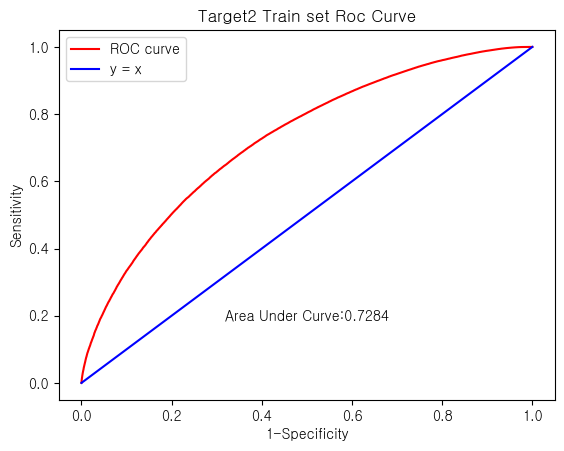

In [ ]:
tr_pred2_target2 = model2_target2.predict(train_2)
tr_pred2_target2

train_2['tr_pred2_target2'] = tr_pred2_target2

cal2_target2 = train_2.copy()

cal2_target2.dropna(subset=['tr_pred2_target2'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2_target2['target2'], cal2_target2['tr_pred2_target2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2_target2['target2'], cal2_target2['tr_pred2_target2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target2 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
cal2_target2['prob_5'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2_target2['prob_6'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2_target2['prob_7'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2_target2['prob_8'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2_target2['prob_9'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2_target2['prob_85'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2_target2[cal2_target2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(cal2_target2[cal2_target2['target2']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.5])}")
print(f"prob_5개수:{len(cal2_target2[cal2_target2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.6])}")
print(f"prob_6개수:{len(cal2_target2[cal2_target2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.7])}")
print(f"prob_7개수:{len(cal2_target2[cal2_target2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.8])}")
print(f"prob_8개수:{len(cal2_target2[cal2_target2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.9])}")
print(f"prob_9개수:{len(cal2_target2[cal2_target2['prob_9']==1])}")

5이상개수:101564
TARGET1개수:187915
0.5이상개수:231815
prob_5개수:231815
0.6이상개수:196554
prob_6개수:196554
0.7이상개수:145469
prob_7개수:145469
0.8이상개수:79143
prob_8개수:79143
0.9이상개수:19212
prob_9개수:19212


#### confusion matirx, train_2

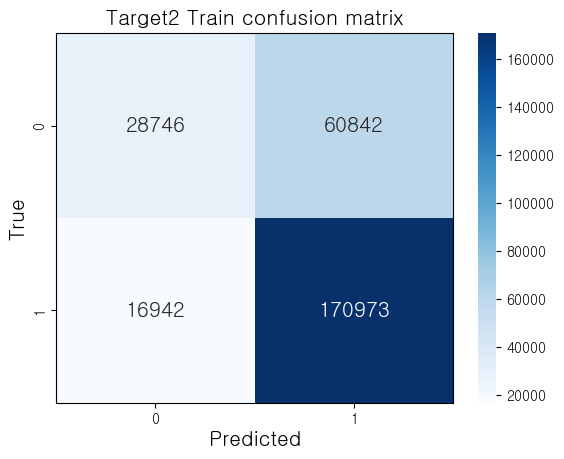

In [ ]:
# cut-off 0.5
cm = confusion_matrix(cal2_target2['target2'], cal2_target2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target2 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [ ]:
perfo(cal2_target2['target2'], cal2_target2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9098422158954846,
 'Specificity': 0.3208688663660312,
 'Precision': 0.7375407113430968,
 'Accuracy': 0.7197003275640264,
 'F-beta Score': 0.8146808662711743}

#### train_2, test 성능 보기

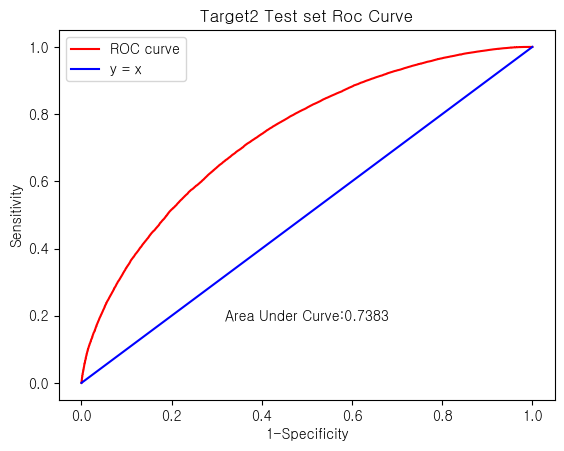

In [ ]:
val_pred2_target2 = model2_target2.predict(val)
val_copy2_target2 = val.copy()
val_copy2_target2['val_pred2_target2'] = val_pred2_target2

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2_target2['target2'], val_copy2_target2['val_pred2_target2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2_target2['target2'], val_copy2_target2['val_pred2_target2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target2 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
val_copy2_target2['prob_5'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2_target2['prob_6'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2_target2['prob_7'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2_target2['prob_8'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2_target2['prob_9'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2_target2['prob_85'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2_target2[val_copy2_target2['근내환산점수']>=4])}")
print(f"TARGET2개수:{len(val_copy2_target2[val_copy2_target2['target2']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.5])}")
print(f"prob_5개수:{len(val_copy2_target2[val_copy2_target2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.6])}")
print(f"prob_6개수:{len(val_copy2_target2[val_copy2_target2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.7])}")
print(f"prob_7개수:{len(val_copy2_target2[val_copy2_target2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.8])}")
print(f"prob_8개수:{len(val_copy2_target2[val_copy2_target2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.9])}")
print(f"prob_9개수:{len(val_copy2_target2[val_copy2_target2['prob_9']==1])}")

5이상개수:90616
TARGET2개수:90616
0.5이상개수:112348
prob_5개수:112348
0.6이상개수:98616
prob_6개수:98616
0.7이상개수:77030
prob_7개수:77030
0.8이상개수:45644
prob_8개수:45644
0.9이상개수:12141
prob_9개수:12141


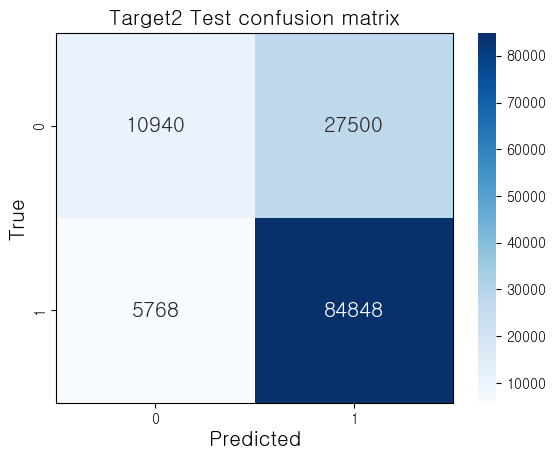

In [ ]:
# cut-off 0.5
cm = confusion_matrix(val_copy2_target2['target2'], val_copy2_target2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target2 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [ ]:
perfo(val_copy2_target2['target2'], val_copy2_target2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9363467820252495,
 'Specificity': 0.2845993756503642,
 'Precision': 0.7552248371132553,
 'Accuracy': 0.7422204314406149,
 'F-beta Score': 0.8360891586685324}

In [ ]:
val_copy2_target2.to_csv('../result/validation_target2.csv', encoding='cp949', index=False)

### target3

In [ ]:
model2_target3 = sm.Logit.from_formula(""" target3 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + 형매근내평균가산점수+ 거세우형매도축단가가산평균 + 어미형매근내평균가산점수 
                              + 외할미형매근내평균가산점수+ 농가근내평균가산점수 
                              + 농가도체중평균가산점수 + 출생산차 """, train_2).fit()

model2_target3.summary()

Optimization terminated successfully.
         Current function value: 0.265437
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target3   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277485
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1749
Time:                        15:25:19   Log-Likelihood:                -73660.
converged:                       True   LL-Null:                       -89276.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.5313      0.373    -12.138      0.000      -5.263      -3.800
도축개월령             -0.0032      0.003     -0.997      0.319      -0.009       0.003
생시체중               0.0078      0.000     65.425      0.000       0.008       0.008
EPD근내             -0.0778      0.025     -3.083      0.002      -0.127      -0.028
EPD냉도체중           -0.0010      0.001     -1.058      0.290      -0.003       0.001
KPN체고             -0.0071      0.004     -2.022      0.043      -0.014      -0.000
KPN체장              0.0030      0.002      1.722      0.085      -0.000       0.006
개월령의근내평균           0.2601      0.028      9.144      0.000       0.204       0.316
개월령의도체중평균         -0.0019      0.000     -4.322      0.000      -0.003      -0.001
개월령의도체범위의근내평균      0.9325      0.023     39.837      0.000       0.887       0.978
개월령의도체범위의도체중평균    -0.0109      0.000    -33.742      0.000      -0.011      -0.010
형매근내평균가산점수         0.2316      0.006     38.821      0.000       0.220       0.243
거세우형매도축단가가산평균   2.654e-05   8.06e-06      3.294      0.001    1.07e-05    4.23e-05
어미형매근내평균가산점수       0.3003      0.022     13.631      0.000       0.257       0.343
외할미형매근내평균가산점수      0.1595      0.048      3.320      0.001       0.065       0.254
농가근내평균가산점수         0.3238      0.009     36.618      0.000       0.306       0.341
농가도체중평균가산점수        0.0017      0.000      6.290      0.000       0.001       0.002
출생산차            2.601e-06   3.13e-05      0.083      0.934   -5.87e-05    6.39e-05
==================================================================================
"""

#### train_2, train 성능 보기

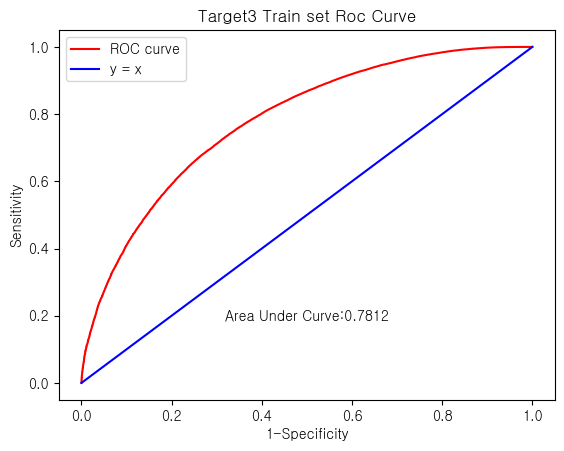

In [ ]:
tr_pred2_target3 = model2_target3.predict(train_2)
tr_pred2_target3

train_2['tr_pred2_target3'] = tr_pred2_target3

cal2_target3 = train_2.copy()

cal2_target3.dropna(subset=['tr_pred2_target3'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2_target3['target3'], cal2_target3['tr_pred2_target3'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2_target3['target3'], cal2_target3['tr_pred2_target3'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target3 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
cal2_target3['prob_5'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2_target3['prob_6'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2_target3['prob_7'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2_target3['prob_8'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2_target3['prob_9'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2_target3['prob_85'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2_target3[cal2_target3['근내환산점수']>=3])}")
print(f"TARGET1개수:{len(cal2_target3[cal2_target3['target3']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.5])}")
print(f"prob_5개수:{len(cal2_target3[cal2_target3['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.6])}")
print(f"prob_6개수:{len(cal2_target3[cal2_target3['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.7])}")
print(f"prob_7개수:{len(cal2_target3[cal2_target3['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.8])}")
print(f"prob_8개수:{len(cal2_target3[cal2_target3['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.9])}")
print(f"prob_9개수:{len(cal2_target3[cal2_target3['prob_9']==1])}")

5이상개수:250177
TARGET1개수:250177
0.5이상개수:272527
prob_5개수:272527
0.6이상개수:269833
prob_6개수:269833
0.7이상개수:263686
prob_7개수:263686
0.8이상개수:247117
prob_8개수:247117
0.9이상개수:192397
prob_9개수:192397


#### confusion matirx, train_2

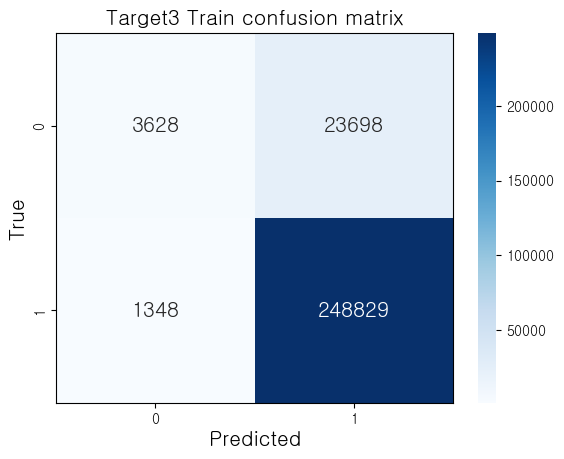

In [ ]:
# cut-off 0.5
cm = confusion_matrix(cal2_target3['target3'], cal2_target3['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target3 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [ ]:
perfo(cal2_target3['target3'], cal2_target3['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9946118148350968,
 'Specificity': 0.13276732781965894,
 'Precision': 0.9130434782608695,
 'Accuracy': 0.909745119872578,
 'F-beta Score': 0.9520837797300192}

#### train_2, test 성능 보기

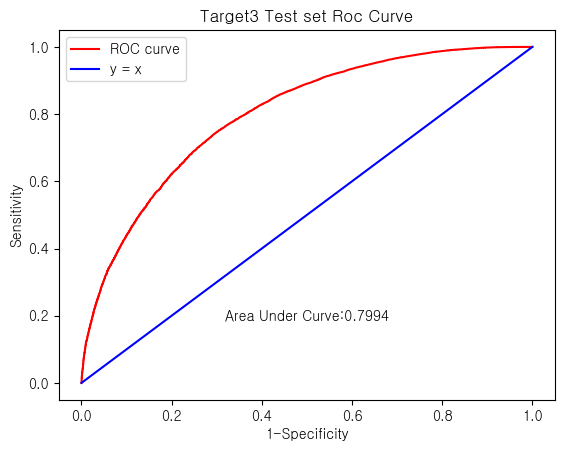

In [ ]:
val_pred2_target3 = model2_target3.predict(val)
val_copy2_target3 = val.copy()
val_copy2_target3['val_pred2_target3'] = val_pred2_target3

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2_target3['target3'], val_copy2_target3['val_pred2_target3'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2_target3['target3'], val_copy2_target3['val_pred2_target3'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target3 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
val_copy2_target3['prob_5'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2_target3['prob_6'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2_target3['prob_7'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2_target3['prob_8'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2_target3['prob_9'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2_target3['prob_85'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2_target3[val_copy2_target3['근내환산점수']>=3])}")
print(f"TARGET1개수:{len(val_copy2_target3[val_copy2_target3['target3']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.5])}")
print(f"prob_5개수:{len(val_copy2_target3[val_copy2_target3['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.6])}")
print(f"prob_6개수:{len(val_copy2_target3[val_copy2_target3['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.7])}")
print(f"prob_7개수:{len(val_copy2_target3[val_copy2_target3['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.8])}")
print(f"prob_8개수:{len(val_copy2_target3[val_copy2_target3['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.9])}")
print(f"prob_9개수:{len(val_copy2_target3[val_copy2_target3['prob_9']==1])}")

5이상개수:118300
TARGET1개수:118300
0.5이상개수:126762
prob_5개수:126762
0.6이상개수:125584
prob_6개수:125584
0.7이상개수:123271
prob_7개수:123271
0.8이상개수:117548
prob_8개수:117548
0.9이상개수:96913
prob_9개수:96913


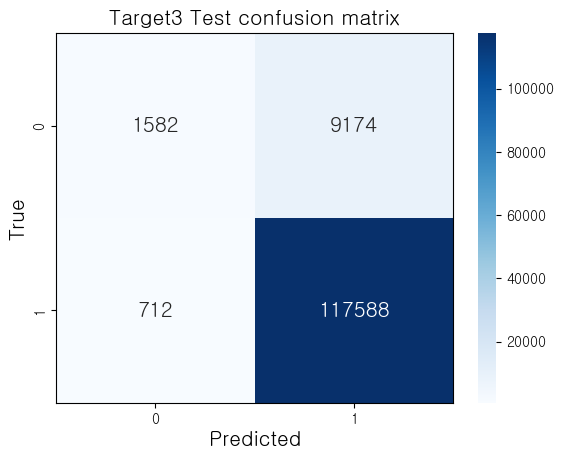

In [ ]:
# cut-off 0.5
cm = confusion_matrix(val_copy2_target3['target3'], val_copy2_target3['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target3 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [ ]:
perfo(val_copy2_target3['target3'], val_copy2_target3['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9939814032121724,
 'Specificity': 0.14708069914466346,
 'Precision': 0.9276281535475931,
 'Accuracy': 0.923397594842549,
 'F-beta Score': 0.9596591882870457}

In [ ]:
val_copy2_target3.to_csv('../result/validation_target3.csv', encoding='cp949', index=False)